# Homework 3
## STAT-6289

#### Chengyi Yang
#### G 41160789

##### Load the data and inspect them：

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv(r"C:\Users\yangc\Desktop\TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


##### Split the data into training and test sets to avoid overfitting and to be able to investigate the generalization ability of our model:

In [2]:
training_set = df.iloc[:800, 1:2].values 
test_set = df.iloc[800:, 1:2].values

### Question 1: Visualize the results with timelag = 1, 7, 14 days

##### Build the input features with time lag of 1 day (lag 1)

In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

##### Build the input features with time lag of 7 days (lag 7)

In [4]:
X_train_1 = []
y_train_1 = []
for i in range(66, 800):
    X_train_1.append(training_set_scaled[i-66:i-6, 0])
    y_train_1.append(training_set_scaled[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))

##### Build the input features with time lag of 14 days (lag 14)

In [5]:
X_train_2 = []
y_train_2 = []
for i in range(73, 800):
    X_train_2.append(training_set_scaled[i-73:i-13, 0])
    y_train_2.append(training_set_scaled[i, 0])
X_train_2, y_train_2 = np.array(X_train_2), np.array(y_train_2)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1))

We have now reshaped the data into the following format (#values, #time-steps, #1 dimensional output).

### Model 1
#### Time lag = 1 day
#### 50 neurons, 4 hidden layers, dropout rate = 0.2, batch size = 32.

Now, it’s time to build the model. We will build the LSTM with 50 neurons and 4 hidden layers. Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [6]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 32ms/step - loss: 0.0798
Epoch 2/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0184
Epoch 3/100
24/24 [==============================] - 1s 34ms/step - loss: 0.0137
Epoch 4/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0137
Epoch 5/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0128
Epoch 6/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0124
Epoch 7/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0130
Epoch 8/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0108
Epoch 9/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0117
Epoch 10/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0102
Epoch 11/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0097
Epoch 12/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0100
Epoch 13/100
24/24 [=====

Prepare the test data (reshape them)

In [7]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


Make Predictions using the test set

In [8]:
predicted_stock_price_1 = model1.predict(X_test)
predicted_stock_price_1 = sc.inverse_transform(predicted_stock_price_1)

### Model 2
#### Time lag = 7 days
#### 50 neurons, 4 hidden layers, dropout rate = 0.2, batch size = 32.

In [9]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(X_train_1, y_train_1, epochs = 100, batch_size = 32)



# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test_1 = []
for i in range(66, 519):
    X_test_1.append(inputs[i-66:i-6, 0])
X_test_1 = np.array(X_test_1)
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
print(X_test_1.shape)
# (459, 60, 1)



predicted_stock_price_2 = model2.predict(X_test_1)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

Epoch 1/100
23/23 [==============================] - 4s 31ms/step - loss: 0.0605
Epoch 2/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0191
Epoch 3/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0163
Epoch 4/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0161
Epoch 5/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0163
Epoch 6/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0148
Epoch 7/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0146
Epoch 8/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0153
Epoch 9/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0145
Epoch 10/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0145
Epoch 11/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0166
Epoch 12/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0146
Epoch 13/100
23/23 [=====

### Model 3
#### Time lag = 14 day
#### 50 neurons, 4 hidden layers, dropout rate = 0.2, batch size = 32.

In [10]:
model3 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model3.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50))
model3.add(Dropout(0.2))
# Adding the output layer
model3.add(Dense(units = 1))

# Compiling the RNN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model3.fit(X_train_2, y_train_2, epochs = 100, batch_size = 32)



# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test_2 = []
for i in range(73, 519):
    X_test_2.append(inputs[i-73:i-13, 0])
X_test_2 = np.array(X_test_2)
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
print(X_test_2.shape)
# (459, 60, 1)



predicted_stock_price_3 = model3.predict(X_test_2)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

Epoch 1/100
23/23 [==============================] - 4s 31ms/step - loss: 0.0801
Epoch 2/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0220
Epoch 3/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0173
Epoch 4/100
23/23 [==============================] - 1s 31ms/step - loss: 0.0194
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0195
Epoch 6/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0216
Epoch 7/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0189
Epoch 8/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0183
Epoch 9/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0177
Epoch 10/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0181
Epoch 11/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0182
Epoch 12/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0189
Epoch 13/100
23/23 [=====

#### Visualising the results of Question 1

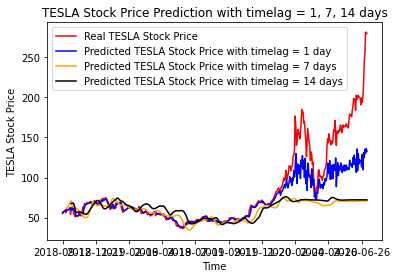

In [11]:

plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_1, color = 'blue', label = 'Predicted TESLA Stock Price with timelag = 1 day')
plt.plot(df.loc[806:, 'Date'],predicted_stock_price_2, color = 'orange', label = 'Predicted TESLA Stock Price with timelag = 7 days')
plt.plot(df.loc[813:, 'Date'],predicted_stock_price_3, color = 'black', label = 'Predicted TESLA Stock Price with timelag = 14 days')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction with timelag = 1, 7, 14 days')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

### Question 2: Make comparisons of different number of hidden layers, batch size and dropout rate

### Model 4
#### Time lag = 1 day
#### 50 neurons, 4 hidden layers, dropout rate = 0.2, batch size = 10.

In [12]:
model4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50))
model4.add(Dropout(0.2))
# Adding the output layer
model4.add(Dense(units = 1))

# Compiling the RNN
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model4.fit(X_train, y_train, epochs = 100, batch_size = 10)



# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)



predicted_stock_price_4 = model4.predict(X_test)
predicted_stock_price_4 = sc.inverse_transform(predicted_stock_price_4)

Epoch 1/100
74/74 [==============================] - 4s 18ms/step - loss: 0.0360
Epoch 2/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0122
Epoch 3/100
74/74 [==============================] - 1s 18ms/step - loss: 0.0125
Epoch 4/100
74/74 [==============================] - 1s 18ms/step - loss: 0.0113
Epoch 5/100
74/74 [==============================] - 1s 18ms/step - loss: 0.0104
Epoch 6/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0087
Epoch 7/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0100
Epoch 8/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0090
Epoch 9/100
74/74 [==============================] - 1s 18ms/step - loss: 0.0073
Epoch 10/100
74/74 [==============================] - 1s 18ms/step - loss: 0.0071
Epoch 11/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0070
Epoch 12/100
74/74 [==============================] - 1s 19ms/step - loss: 0.0072
Epoch 13/100
74/74 [=====

### Model 5
#### Time lag = 1 day
#### 50 neurons, 6 hidden layers, dropout rate = 0.2, batch size = 32.

In [13]:
model5 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model5.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True))
model5.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True))
model5.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True))
model5.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True))
model5.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50))
model5.add(Dropout(0.2))
# Adding the output layer
model5.add(Dense(units = 1))

# Compiling the RNN
model5.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model5.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)



predicted_stock_price_5 = model5.predict(X_test)
predicted_stock_price_5 = sc.inverse_transform(predicted_stock_price_5)

Epoch 1/100
24/24 [==============================] - 6s 46ms/step - loss: 0.0717
Epoch 2/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0179
Epoch 3/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0157
Epoch 4/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0164
Epoch 5/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0179
Epoch 6/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0194
Epoch 7/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0134
Epoch 8/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0144
Epoch 9/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0156
Epoch 10/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0136
Epoch 11/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0125
Epoch 12/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0123
Epoch 13/100
24/24 [=====

### Model 6
#### Time lag = 1 day
#### 50 neurons, 4 hidden layers, dropout rate = 0.4, batch size = 32.

In [14]:
model6 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model6.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model6.add(Dropout(0.4))
# Adding a second LSTM layer and some Dropout regularisation
model6.add(LSTM(units = 50, return_sequences = True))
model6.add(Dropout(0.4))
# Adding a third LSTM layer and some Dropout regularisation
model6.add(LSTM(units = 50, return_sequences = True))
model6.add(Dropout(0.4))
# Adding a fourth LSTM layer and some Dropout regularisation
model6.add(LSTM(units = 50))
model6.add(Dropout(0.4))
# Adding the output layer
model6.add(Dense(units = 1))

# Compiling the RNN
model6.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model6.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)



predicted_stock_price_6 = model6.predict(X_test)
predicted_stock_price_6 = sc.inverse_transform(predicted_stock_price_6)

Epoch 1/100
24/24 [==============================] - 4s 31ms/step - loss: 0.0631
Epoch 2/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0208
Epoch 3/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0180
Epoch 4/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0172
Epoch 5/100
24/24 [==============================] - 1s 33ms/step - loss: 0.0155
Epoch 6/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0141
Epoch 7/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0143
Epoch 8/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0153
Epoch 9/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0147
Epoch 10/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0155
Epoch 11/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0144
Epoch 12/100
24/24 [==============================] - 1s 32ms/step - loss: 0.0131
Epoch 13/100
24/24 [=====

#### Visualising the results of Question 2

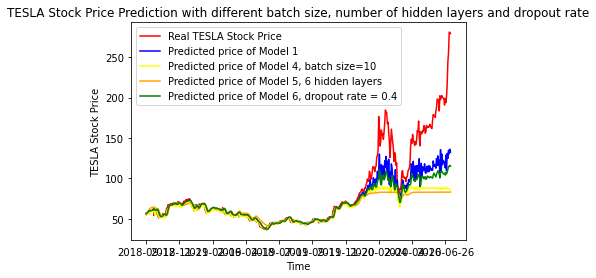

In [15]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_1, color = 'blue', label = 'Predicted price of Model 1')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_4, color = 'yellow', label = 'Predicted price of Model 4, batch size=10')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_5, color = 'orange', label = 'Predicted price of Model 5, 6 hidden layers')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_6, color = 'green', label = 'Predicted price of Model 6, dropout rate = 0.4')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction with different batch size, number of hidden layers and dropout rate')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

#### Results of Question 2

From the plot we could see that:

When changing the batch size from 32 to 10, the model fits worse. The diffenence between Real Price and Predicted price is larger than the origin model.

When changing the number of hidden layers from 4 to 6, the model is the worst.

And when changing the dropout rate from 0.2 to 0.4, the model is worser than the origin model.

So, the origin model (batch size = 32, 4 hidden layers and dropout rate = 0.2) is the best.

### Question 3: Using the data provided, make predictions for future two weeks, until Oct 2020. Visualize the results.  

In [34]:
full_test=dataset_test.values
full_test_fit=sc.fit_transform(full_test)


for k in range(6):
    future_data = []
    for i in range(14):
        future_data.append(full_test_fit[len(full_test_fit)-73+i:len(full_test_fit)-13+i])
    future_data = np.array(future_data)
    future_data = np.reshape(future_data, (future_data.shape[0], future_data.shape[1], 1))
    future_result = model3.predict(future_data)
    full_test_fit = np.append(full_test_fit,future_result)

predict_value = sc.inverse_transform(full_test_fit[-84:].reshape(84,1).tolist())

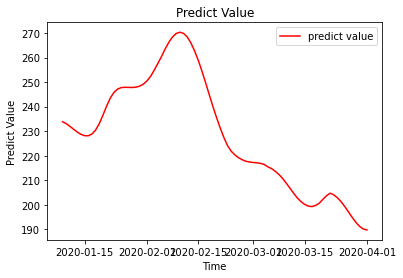

In [42]:
date=pd.date_range(start='01/09/2020', periods=84)
plt.plot(date, predict_value, color = 'red', label = 'predict value')
plt.title('Predict Value')
plt.xlabel('Time')
plt.ylabel('Predict Value')
plt.legend()
plt.plot()
plt.show()
